<a href="https://colab.research.google.com/github/tiravata/2014-slides/blob/master/19_tensorflow_object_detection_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="45px" src="https://avatars3.githubusercontent.com/u/20337240?s=460&v=4" align="left" hspace="10px" vspace="0px">

<h1>ใช้ AI ตรวจจับวัตถุในรูปภาพ โดยใช้ tensorflow</h1>

<a href='https://www.facebook.com/programmerthai'><font color='green'>สรุปและเรียบเรียงโดยโปรแกรมเมอร์ไทย thai programmer</font></a>

<hr>

cite

https://github.com/tensorflow/models/tree/master/research/object_detection

https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md

# วิธีใช้งาน colab

Colab พัฒนาโดย google เป็นหน้าเว็บเอาไว้ใช้เขียนโค้ด python ได้ผ่านทางหน้าเว็บ และเชื่อมต่อกับ google drive ของเราก็ได้ด้วย ซึ่ง colab หน้านี้**ได้รวบรวมเนื้อหา Python ของม.ต้น** เอาไว้ แต่ก่อนอื่นอยากให้ดูวิธีการใช้งาน colab เสียก่อน

<font color='red'>** ต้องมี Gmail และ google drive</font>

<hr/>

<h3>วิธี 1) กด "Open in playgrouhd"</h3>
<div>
<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2020/05/python_matayom_4.png" align="center" hspace="10px" vspace="0px">


<hr/>

<h3>วิธี 2) กด Save a copy in Drive ... เพื่อบันทึกไว้ google drive เครื่องเรา</h3>

<img height="300px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_1.png" align="center" hspace="10px" vspace="0px">

<br/>

<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_2.png" align="center" hspace="10px" vspace="0px">

<hr/>

<h3>จากนั้นถึงจะสามารถรันได้</h3>
<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_3.png" align="center" hspace="10px" vspace="0px">

# Clone repo

In [ ]:
%cd /content
!git clone https://github.com/tensorflow/models


import os
import pathlib

'''
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models
'''


/content
Cloning into 'models'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 39704 (delta 16), reused 20 (delta 0), pack-reused 39660
Receiving objects: 100% (39704/39704), 548.52 MiB | 24.06 MiB/s, done.
Resolving deltas: 100% (26751/26751), done.


'\nif "models" in pathlib.Path.cwd().parts:\n  while "models" in pathlib.Path.cwd().parts:\n    os.chdir(\'..\')\nelif not pathlib.Path(\'models\').exists():\n  !git clone --depth 1 https://github.com/tensorflow/models\n'

In [ ]:
!pip install tf_slim

     |████████████████████████████████| 358kB 7.3MB/s 


# COCO API installation

## Protobuf-compiler installation and usage

In [ ]:
!pip install pycocotools

In [ ]:
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.


/content/models/research
object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.


#  Install object-detection-0.1

In [ ]:
%%bash 
cd /content/models/research
pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1309595 sha256=c909792adf01af887fda1d75eaae475a9d3a8012e38b509965051eabc98ad453
  Stored in directory: /tmp/pip-ephem-wheel-cache-mpaycg3m/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection


# Imports


In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

Import object_dection library

In [ ]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util


Patches:

In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [ ]:

#!python object_detection/builders/model_builder_tf1_test.py


# Model preparation

 

ดาวน์โหลด Model  
โดยชื่อโมเดลเราสามารถดูรายละเอียดได้ที่  model zoo
 https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md

 มิฉะนั้นโดย default ก็คือโมเดล
 "SSD with Mobilenet"l

In [ ]:
def load_model(model_name):
  base_url = 'http://download.tensorflow.org/models/object_detection/'
  model_file = model_name + '.tar.gz'
  model_dir = tf.keras.utils.get_file(
    fname=model_name, 
    origin=base_url + model_file,
    untar=True)

  model_dir = pathlib.Path(model_dir)/"saved_model"

  model = tf.saved_model.load(str(model_dir))

  return model

รายชื่อ label

In [ ]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

ใช้รูปตัวอย่าง

In [ ]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('models/research/object_detection/test_images')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[]

# Detection

In [ ]:
model_name = 'ssd_mobilenet_v1_coco_2017_11_17'
detection_model = load_model(model_name)

76537856/76534733 [==============================] - 1s 0us/step
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
print(detection_model.signatures['serving_default'].inputs)
print(detection_model.signatures['serving_default'].output_dtypes)
print(detection_model.signatures['serving_default'].output_shapes)

[<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]
{'detection_classes': tf.float32, 'num_detections': tf.float32, 'detection_boxes': tf.float32, 'detection_scores': tf.float32}
{'detection_classes': TensorShape([None, 100]), 'num_detections': TensorShape([None]), 'detection_boxes': TensorShape([None, 100, 4]), 'detection_scores': TensorShape([None, 100])}


In [ ]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [ ]:
import IPython.display

def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

 
  #display(Image.fromarray(image_np))

  im = Image.fromarray(image_np)
  width, height = im.size  
  im = im.resize( ( int(width/2) , int(height/2) ) )
  display(im)
  

--2020-07-28 06:32:40--  https://www.thairath.co.th/media/Dtbezn3nNUxytg04N0wZYhD8jbf9Z5rVL7Ax3hJjL3ZAZM.jpg
Resolving www.thairath.co.th (www.thairath.co.th)... 167.114.118.169, 167.114.156.121
Connecting to www.thairath.co.th (www.thairath.co.th)|167.114.118.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230799 (225K) [image/jpeg]
Saving to: ‘/content/models/research/object_detection/test_images/test1.jpg’

/content/models/res 100%[===================>] 225.39K   870KB/s    in 0.3s    

2020-07-28 06:32:41 (870 KB/s) - ‘/content/models/research/object_detection/test_images/test1.jpg’ saved [230799/230799]

--2020-07-28 06:32:43--  https://www.auto-thailand.com/images/column_1342855166/bangkok-usedcar19.jpg
Resolving www.auto-thailand.com (www.auto-thailand.com)... 203.151.233.87
Connecting to www.auto-thailand.com (www.auto-thailand.com)|203.151.233.87|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sta

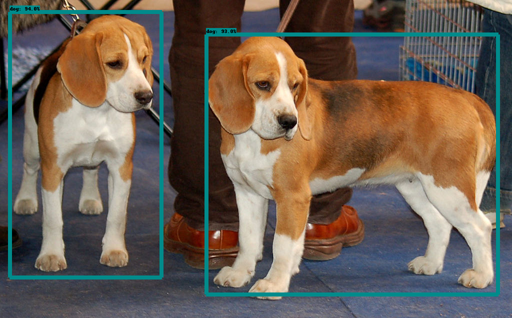

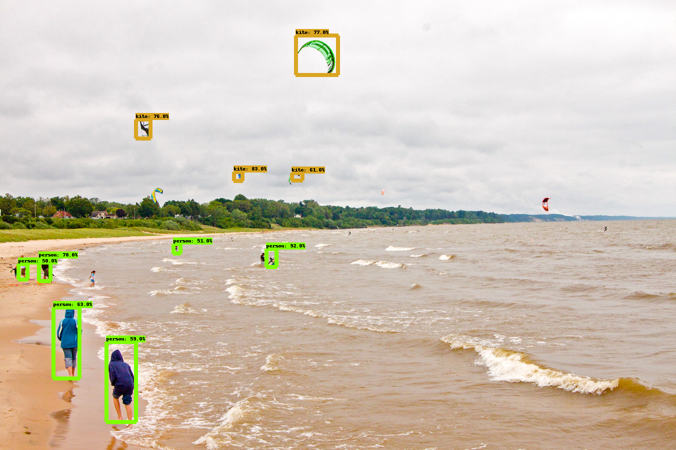

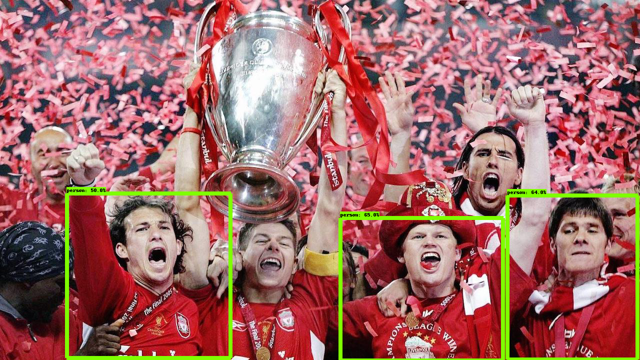

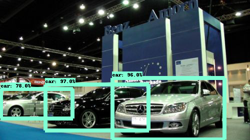

In [ ]:
!wget https://www.thairath.co.th/media/Dtbezn3nNUxytg04N0wZYhD8jbf9Z5rVL7Ax3hJjL3ZAZM.jpg -O/content/models/research/object_detection/test_images/test1.jpg
!wget https://www.auto-thailand.com/images/column_1342855166/bangkok-usedcar19.jpg -O/content/models/research/object_detection/test_images/test2.jpg

PATH_TO_TEST_IMAGES_DIR = pathlib.Path('/content/models/research/object_detection/test_images')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))

for image_path in TEST_IMAGE_PATHS:
  show_inference(detection_model, image_path)

# Instance Segmentation (ยัง error)

In [ ]:
model_name = "mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28"
masking_model = load_model(model_name)

In [ ]:
for image_path in TEST_IMAGE_PATHS:
  show_inference(masking_model, image_path)

# Mounting Google Drive locally

In [ ]:
'''
from google.colab import drive
drive.mount('/content/gdrive')
'''

# MyCode (ค้างไว้เดี่ยวมาแก้ไข)

**for Segmentation with mask**

In [ ]:
# see https://github.com/tensorflow/models/tree/master/research/object_detection
# https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md

"""14_object_detection_tutorial.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1KL4-f-rw3R1IKeNjyUYuAWoj2GjIRaaS

# Object Detection Demo
Welcome to the object detection inference walkthrough!  This notebook will walk you step by step through the process of using a pre-trained model to detect objects in an image. Make sure to follow the [installation instructions](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md) before you start.

# Imports
"""

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
#from object_detection.utils import ops as utils_ops
from utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

"""## Env setup"""

# This is needed to display the images.
# %matplotlib inline

"""## Object detection imports
Here are the imports from the object detection module.
"""

from utils import label_map_util

from utils import visualization_utils as vis_util


In [ ]:
"""# Model preparation

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_FROZEN_GRAPH` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.
"""

# What model to download.
#MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
#MODEL_NAME = 'ssd_mobilenet_v2_coco_2018_03_29'
MODEL_NAME = 'mask_rcnn_inception_v2_coco_2018_01_28'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

"""## Download Model"""
if os.path.isfile(PATH_TO_FROZEN_GRAPH) == False:
  opener = urllib.request.URLopener()
  opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
  tar_file = tarfile.open(MODEL_FILE)
  for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
      tar_file.extract(file, os.getcwd())
      
"""## Load a (frozen) Tensorflow model into memory."""
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

"""## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine
"""

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [ ]:

"""## Helper code"""

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

"""# Detection"""

# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

def run_inference_for_single_image(image):
  #with graph.as_default():
    #with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
      return output_dict

In [ ]:
'''
import cv2
import os

#@title Locate your file video
PATH_OUT = "/content/gdrive/My Drive/tmp/output/"
FILE_VIDEO = "demo_mask_detection.mp4" #@param {type:"string"}
path_in = os.path.join("/content/gdrive/My Drive/tmp/videos/", FILE_VIDEO)
output_file = os.path.join(PATH_OUT, "output_mask.avi")

# Save video
cap = cv2.VideoCapture(path_in)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # float
fps = cap.get(cv2.CAP_PROP_FPS) # float
  
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
total_frame = int(cv2.VideoCapture.get(cap, property_id))		
print("Total frames %s , FPS=%s , width=%s, hight=%s" % (total_frame, fps, width, height))

fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter(output_file, fourcc, fps, (int(width), int(height)))
count =1
DOWNSAMPLE_RATIO = 1.0
# Running the tensorflow session
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess: 
   ret = True    
   while ret:      
      ret, image_np = cap.read()      
      if image_np is None:
        image_np = np.zeros((int(height),int(width),  3) )
        
      if count < 1000:
        count+=1
        continue
      
      if count > 1020:
        break
        
      image_np = cv2.resize(image_np, None, fx=DOWNSAMPLE_RATIO, fy=DOWNSAMPLE_RATIO)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      output_dict = run_inference_for_single_image(image_np)
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
         image_np,
         output_dict['detection_boxes'],
         output_dict['detection_classes'],
         output_dict['detection_scores'],
         category_index,
         instance_masks=output_dict.get('detection_masks'),
         use_normalized_coordinates=True,
         #line_thickness=8)
         line_thickness=3)
      
      #out.write(image_np)
      cv2.imwrite(os.path.join(PATH_OUT, "pic%03d.jpg" % count), image_np)
      #print("frame %d -> %d" % (count, total_frame) , end="\r", flush=True); count+=1
      print("frame %d -> %d" % (count, total_frame) , end="\n", flush=True); count+=1
      """
      if cv2.waitKey(25) & 0xFF == ord('q'):
          cv2.destroyAllWindows()
          cap.release()
          break
      """
cap.release()
'''

# ฝากติดตาม

<img height="20px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2017/06/logo_facebook2.png" align="left" hspace="10px" vspace="0px">  https://www.facebook.com/programmerthai/

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/03/youtube.png" align="left" hspace="10px" vspace="3px">  https://www.youtube.com/channel/UCvhCKtG5cRE6K5--RJPql_w

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/09/github-2.jpg" align="left" hspace="10px" vspace="3px">https://github.com/adminho/machine-learning

In [ ]:
#@title ฝากประชาสัมพันธ์ หนังสือ AI (ปัญญาประดิษฐ์) ไม่ยาก เรียนรู้ได้ด้วยเลขม. ปลาย ราคา 295 บาท
%%HTML
<iframe src="https://www.facebook.com/plugins/post.php?href=https%3A%2F%2Fwww.facebook.com%2Fprogrammerthai%2Fphotos%2Fa.2410667485889755%2F2555677101388792%2F%3Ftype%3D3&width=500" width="500" height="588" style="border:none;overflow:hidden" scrolling="no" frameborder="0" allowTransparency="true" allow="encrypted-media"></iframe>